In [19]:
from utils import get_output, decomposeHermitian, createMatrixEuropeanCall
from ansatz_op import AnsatzOperator
from ansatz import Ansatz
from initialization_function import initializer

import numpy as np
from functools import reduce
from copy import deepcopy
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
r = 0
sigma = 1
T = 0.01
n = 4 
K = 9
s_min = 1
s_max = 15

max_depth = 5
init_depth = 3

alpha = 0.03
epsilon = 2e-3
ds = 0.01

num_steps = 100
init_thetas = []
backend_name = 'statevector_simulator'
shots = 1024

In [73]:
a = 0.5 - r/sigma**2
b = -0.125*(2*r/sigma**2+1)**2

In [4]:
H = createMatrixEuropeanCall(n, b, s_min, s_max)
h_elements, lambdas = decomposeHermitian(H)

In [5]:
operator = AnsatzOperator(num_qubits=n, matrix=H,\
                 backend="statevector_simulator",\
                 shots=shots, depth=init_depth)

In [6]:
initFunc = initializer(operator, K, a, T, s_min, s_max)

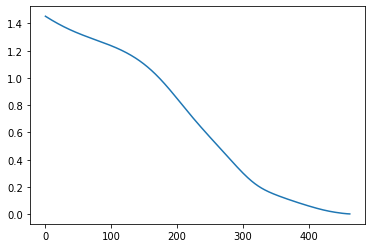

In [39]:
#new_op = initFunc.initialize(init_depth, max_depth, alpha, epsilon, ds)
#plt.plot(initFunc.hist_errors)

In [7]:
thetas = np.array([ 1.66946419,  0.13870458,  0.71643115,  1.34676068,  1.28408153,
        0.0118366 ,  0.43767434,  0.77939032,  0.28615315,  0.60756076,
        0.98231447,  1.33654948, -0.00838558,  1.64166736,  0.53480615,
       -0.07026767,  0.35177157,  1.13948442,  1.79018814, -0.00336823,
        1.51126943,  1.08938065,  0.33785296, -0.41623333,  0.89789562])

In [8]:
new_op = deepcopy(operator)
new_op.construct_circuit(thetas, 3)

In [9]:
result = new_op.execute(sigma, T, num_steps)

C:\Users\skand\Documents\stage natixis\pde ansatz github\ansatz.py:48: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta_point = np.linalg.lstsq(A,C)[0]


Simulation 20 completed
Simulation 40 completed
Simulation 60 completed
Simulation 80 completed
Simulation 100 completed


In [52]:
x_min = np.log(s_min)
x_max = np.log(s_max)
x= np.linspace(x_min, x_max, 2**n)
ts = np.linspace(0,T,num_steps)
ts, x = np.meshgrid(ts,x)

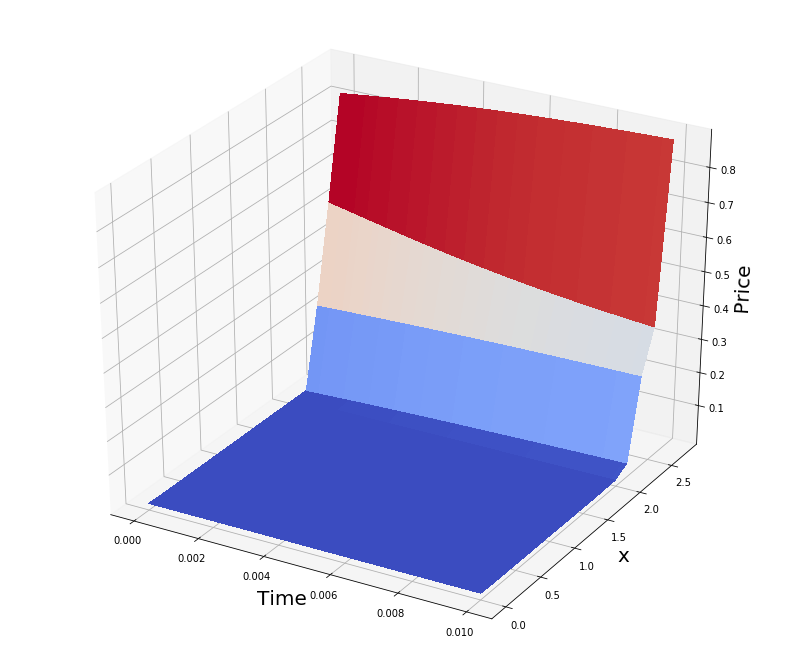

In [53]:
fig = plt.figure(figsize=(14,12))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(list(ts), list(x), result[1:].T, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_ylabel('x', fontsize=20)
ax.set_xlabel('Time', fontsize=20)
ax.set_zlabel('Price', fontsize=20)

plt.show()